# `plot` - plotting
[mpl-colors]: https://matplotlib.org/stable/gallery/color/named_colors.html "List of named colors in Matplotlib"


```{todo}
Write this section.
```


## Colors

### Helper Function for Plotting
First, we define a helper function for making a table of colors (using the [code from the matplotlib docu][mpl-colors]):

In [1]:
import fesslix as flx
flx.load_engine()
import fesslix.plot

import math

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle


def plot_colortable(colors, *, ncols=4, sort_colors=True):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * ncols + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * ncols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

def plot_color_seq(color_seq):
    cdict = {}
    for i, c in enumerate(color_seq):
        cdict[f"id={i+1}"] = c 
    plot_colortable(cdict, sort_colors=False)

Random Number Generator: MT19937 - initialized with rand()=73991063;
Random Number Generator: MT19937 - initialized with 1000 initial calls.


### Predefined colors
The following colors are predefined:

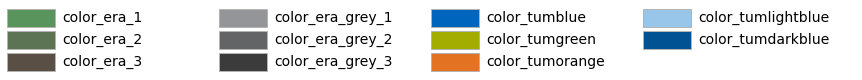

In [2]:
flx_colors = {
    'color_era_1': fesslix.plot.color_era_1,
    'color_era_2': fesslix.plot.color_era_2,
    'color_era_3': fesslix.plot.color_era_3,
    'color_era_grey_1': fesslix.plot.color_era_grey_1,
    'color_era_grey_2': fesslix.plot.color_era_grey_2,
    'color_era_grey_3': fesslix.plot.color_era_grey_3,
    'color_tumblue': fesslix.plot.color_tumblue,
    'color_tumgreen': fesslix.plot.color_tumgreen,
    'color_tumorange': fesslix.plot.color_tumorange,
    'color_tumlightblue': fesslix.plot.color_tumlightblue,
    'color_tumdarkblue': fesslix.plot.color_tumdarkblue,
  }
plot_colortable(flx_colors, sort_colors=False)
plt.show()

### Color sequences
Color sequences are used to automatically assign color values in case of consecutive plotting.

The following sequences are available in the `plot`-module:

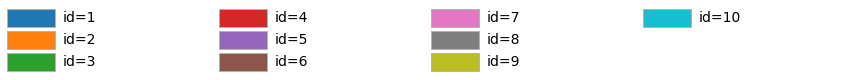

In [3]:
## flx_plot.color_seq
plot_color_seq(fesslix.plot.color_seq)   

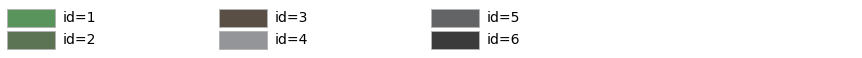

In [4]:
## flx_plot.color_seq_era
plot_color_seq(fesslix.plot.color_seq_era)   

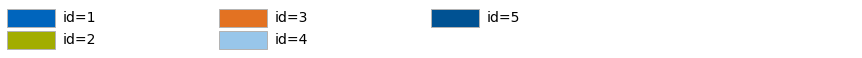

In [5]:
## flx_plot.color_seq_tum
plot_color_seq(fesslix.plot.color_seq_tum)   

## Configuration dictionary

Some functions in the `plot`-module work with a configuration dictionary:

```{eval-rst}
.. py:type:: flx_plot_config
   :canonical: dict

   A collection of configuration properties.

   The following keys are allowed:
     - ``x_low = None`` (*float*): Lower bound of an interval (e.g., for discretization).
     - ``x_up = None`` (*float*): Upper bound of an interval (e.g., for discretization).
     - ``q_low = None`` (*float*): Quantile of a lower bound. If `x_low` is not specified, `q_low` is used in connection with the associated random variable to set the value of `x_low`.
     - ``q_up = None`` (*float*): Quantile of an upper bound. If `x_up` is not specified, `q_up` is used in connection with the associated random variable to set the value of `x_up`.
     - ``q_bounds = 1e-3`` (*float*): If ``q_low`` or ``q_up`` is not specified, ``q_bounds`` is used to set their value.
     - ``x_disc_N = int(1e3)`` (*int*): Number of points to use (e.g., for discretization).
     - ``x_disc_shift = False`` (*bool*): see parameter *x_disc_shift* of :func:`fesslix.tools.discretize_x`.
     - ``x_disc_on_log = False`` (*bool*): see parameter *x_disc_on_log* of :func:`fesslix.tools.discretize_x`.
     - ``label = None`` (*bool*): Assigns a label to an axis.
```

## Functions for plotting

```{eval-rst}
.. function:: fesslix.plot.draw_pdf

    Syntax:
        ``fesslix.plot.draw_pdf(ax, rv, config_dict={}, param_dict={}, reverse_axis=False)``

    Description:
        Plots the PDF of the random variable `rv` on axis `ax`.
        
    :param ax: `axes` object of matplotlib.
    :type ax: matplotlib.axes.Axes
    :param rv: random variable
    :type rv: :class:`flx.rv`
    :param config_dict: configuration dictionary » The parameters ``x_low``, ``x_up``, ``q_low``, ``q_up``, ``q_bounds``, ``x_disc_N``, ``x_disc_shift``, ``x_disc_on_log``, ``label`` are considered.
    :type config_dict: :type:`flx_plot_config`
    :param param_dict: A dictionary for plotting properties related to matplotlib.
    :type param_dict: dict
    :param reverse_axis: If set to `True`, the x- and the y-axis are reversed.
    :type reverse_axis: bool
    :returns: The object returned by ax.plot(...) of matplotlib.
```
**Example:**

(0.0, 0.41871903581662334)

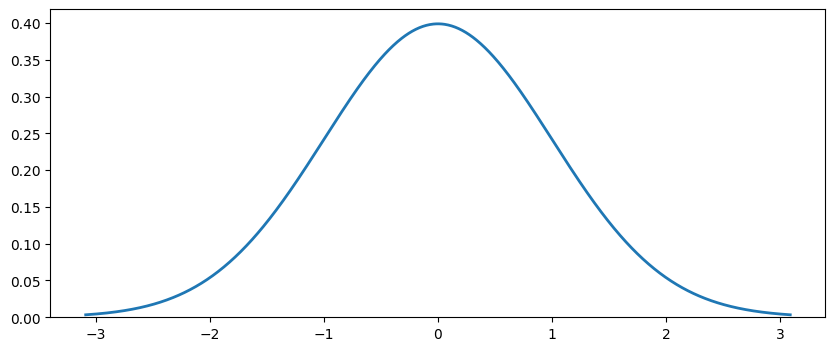

In [6]:
fig, ax = plt.subplots(figsize=(10, 4))

rv = flx.rv({'type':'stdn'})
config_dict = {}
param_dict = { 'lw':2 }
fesslix.plot.draw_pdf(ax,rv, config_dict=config_dict, param_dict=param_dict)
ax.set_ylim(bottom=0.)

```{eval-rst}
.. function:: fesslix.plot.draw_cdf

    Syntax:
        ``fesslix.plot.draw_cdf(ax, rv, config_dict={}, param_dict={}, reverse_axis=False)``

    Description:
        Plots the CDF of the random variable `rv` on axis `ax`.
        
    :param ax: `axes` object of matplotlib.
    :type ax: matplotlib.axes.Axes
    :param rv: random variable
    :type rv: :class:`flx.rv`
    :param config_dict: configuration dictionary » The parameters ``x_low``, ``x_up``, ``q_low``, ``q_up``, ``q_bounds``, ``x_disc_N``, ``x_disc_shift``, ``x_disc_on_log``, ``label`` are considered.
    :type config_dict: :type:`flx_plot_config`
    :param param_dict: A dictionary for plotting properties related to matplotlib.
    :type param_dict: dict
    :param reverse_axis: If set to `True`, the x- and the y-axis are reversed.
    :type reverse_axis: bool
    :returns: The object returned by ax.plot(...) of matplotlib.
```
**Example:**

(0.0, 1.0)

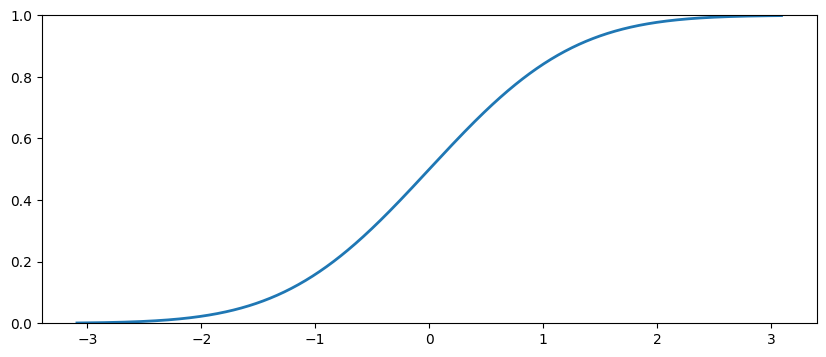

In [7]:
fig, ax = plt.subplots(figsize=(10, 4))

config_dict = {}
param_dict = { 'lw':2 }
fesslix.plot.draw_cdf(ax,rv, config_dict=config_dict, param_dict=param_dict)
ax.set_ylim([0., 1.])